# Scale and Normalize Data

## Get  our enviroment set up

In [1]:
import pandas as pd
import numpy as np

In [5]:
#for box-cox translation =>  to transform power-law or any non-linear distribution to normal
from scipy import stats

#for minmax scaling
from mlxtend.preprocessing import minmax_scaling

#ploting module
import seaborn as sns
import matplotlib.pyplot as plt

#import data
kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")

#set seed for reproductibility
np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

## Scaling

This mean you're transforming your data so that it fits within a specific scale, like 0 - 100 or 0 -1. Some of method: SVM, K-nearest neighbors, KNN.  
By scaling variables, it can help compare diferrent variables on equal footing

Ex:

Text(0.5, 1.0, 'Scaled data')

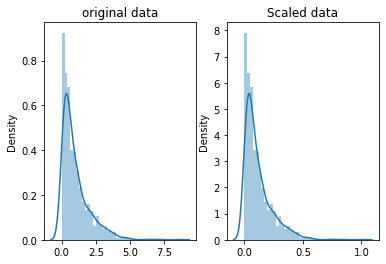

In [6]:
#generate 1000 data points randomly
original_data = np.random.exponential(size = 1000)

#min-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

#plot both todether to compare
fig, ax = plt.subplots(1, 2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title('original data')
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title('Scaled data')

range from 0 - 1

## Normalization

we only want to mormalize data if you're going to be using a machine learning or statitics technique that assumes your data is normally distributed. like t-tests, ANOVAS, linear regression, linear discriminant analysis, Gaussian.  
The method we using to normalize is Box - Cox Transformation.

<AxesSubplot:ylabel='Density'>

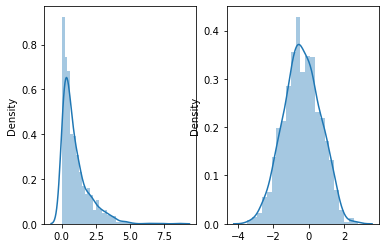

In [8]:
#normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

#plot both together to compare
fig, ax= plt.subplots(1, 2)
sns.distplot(original_data, ax=ax[0])
sns.distplot(normalized_data[0], ax=ax[1])

### Practice Scaling

<AxesSubplot:ylabel='Density'>

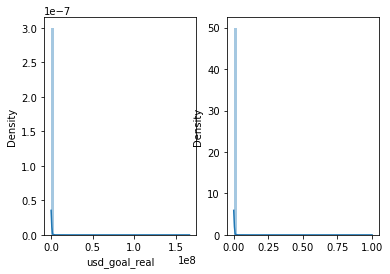

In [9]:
#select the usd_goal_real column
usd_goal = kickstarters_2017.usd_goal_real

scaled_data = minmax_scaling(usd_goal, columns=[0])

fig, ax = plt.subplots(1,2)
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
sns.distplot(scaled_data, ax=ax[1])

Scaling Goal column

<AxesSubplot:ylabel='Density'>

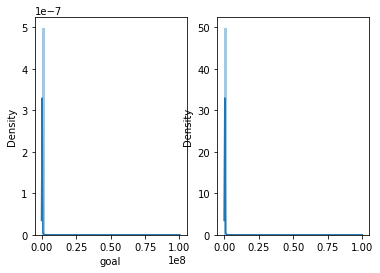

In [11]:
goal_column = kickstarters_2017.goal

scaled_data = minmax_scaling(goal_column, columns=[0])
fig, ax = plt.subplots(1,2)
sns.distplot(kickstarters_2017.goal, ax=ax[0])
sns.distplot(scaled_data, ax=ax[1])

### Pratice normalization

<AxesSubplot:ylabel='Density'>

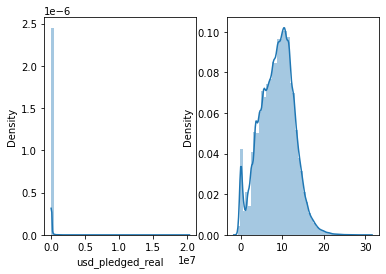

In [12]:
#get the index of all positive pledges (box-cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

#get only positive pledges (using their index)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

#normal the pledges
normal_pledges = stats.boxcox(positive_pledges)[0]


fig, ax = plt.subplots(1, 2)
sns.distplot(positive_pledges, ax=ax[0])
sns.distplot(normal_pledges, ax=ax[1])

Pledged column

<AxesSubplot:ylabel='Density'>

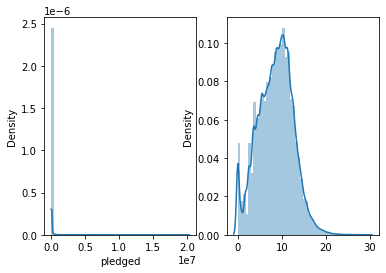

In [13]:
index_positive_pledged = kickstarters_2017.pledged > 0
positive_pledged = kickstarters_2017.pledged.loc[index_positive_pledged]
normal_pledged = stats.boxcox(positive_pledged)[0]

fig, ax=plt.subplots(1, 2)
sns.distplot(positive_pledged, ax=ax[0])
sns.distplot(normal_pledged, ax=ax[1])